In [ ]:
# Part 1: Data Loading and Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load Control and Test Datasets with Correct Delimiter
control_file = '/content/control_group.csv'
test_file = '/content/test_group.csv'

try:
    control_data = pd.read_csv(control_file, sep=';')
    print(f"Control group dataset '{control_file}' loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{control_file}' was not found. Please check the file path.")

try:
    test_data = pd.read_csv(test_file, sep=';')
    print(f"Test group dataset '{test_file}' loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{test_file}' was not found. Please check the file path.")

# 3. Add Group Identifier Column
control_data['Group'] = 'Control'
test_data['Group'] = 'Test'

# 4. Combine the Datasets
combined_data = pd.concat([control_data, test_data], axis=0).reset_index(drop=True)

print(f"\nCombined dataset shape: {combined_data.shape}")
print(f"Number of Control group records: {(combined_data['Group'] == 'Control').sum()}")
print(f"Number of Test group records: {(combined_data['Group'] == 'Test').sum()}")

# 5. Inspect the Combined Data
print("\nFirst 5 rows of the combined dataset:")
print(combined_data.head())

print("\nDataset Information:")
print(combined_data.info())

print("\nStatistical Summary:")
print(combined_data.describe())

print("\nChecking for missing values:")
print(combined_data.isnull().sum())

# 6. Handle Missing Values
missing_values = combined_data.isnull().sum()
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("\nColumns with missing values:")
    print(missing_values)

    # Strategies used to handle missing values:
    # - For numerical columns: fill with mean or median
    # - For categorical columns: fill with mode or a placeholder

    numerical_cols = combined_data.select_dtypes(include=[np.number]).columns.tolist()
    for col in numerical_cols:
        if combined_data[col].isnull().sum() > 0:
            median = combined_data[col].median()
            combined_data[col].fillna(median, inplace=True)
            print(f"Filled missing values in '{col}' with median value {median}.")

    categorical_cols = combined_data.select_dtypes(include=['object']).columns.tolist()
    for col in categorical_cols:
        if combined_data[col].isnull().sum() > 0:
            mode = combined_data[col].mode()[0]
            combined_data[col].fillna(mode, inplace=True)
            print(f"Filled missing values in '{col}' with mode value '{mode}'.")
else:
    print("\nNo missing values detected.")

# Verify that there are no more missing values
print("\nMissing values after imputation:")
print(combined_data.isnull().sum())

# 7. Convert 'Date' column to datetime
if 'Date' in combined_data.columns:
    combined_data['Date'] = pd.to_datetime(combined_data['Date'], format='%d.%m.%Y', errors='coerce')
    if combined_data['Date'].isnull().sum() > 0:
        print("\nThere were errors converting some 'Date' entries to datetime. Please check the data.")
    else:
        print("\n'Date' column successfully converted to datetime.")
else:
    print("\n'Date' column not found in the dataset.")

print("\nData types after conversion:")
print(combined_data.dtypes)

# 8. Create Additional Features like Calculate Click-Through Rate (CTR) and Conversion Rate
# CTR (%) = (# of Website Clicks / # of Impressions) * 100
# Conversion Rate (%) = (# of Purchase / # of Website Clicks) * 100

def calculate_ctr(row):
    try:
        return (row['# of Website Clicks'] / row['# of Impressions']) * 100
    except ZeroDivisionError:
        return 0

def calculate_conversion_rate(row):
    try:
        return (row['# of Purchase'] / row['# of Website Clicks']) * 100
    except ZeroDivisionError:
        return 0

combined_data['CTR (%)'] = combined_data.apply(calculate_ctr, axis=1)
combined_data['Conversion Rate (%)'] = combined_data.apply(calculate_conversion_rate, axis=1)

print("\nAdded 'CTR (%)' and 'Conversion Rate (%)' columns.")

# Display the first 5 rows of the cleaned and combined data
print("\nFirst 5 rows of the cleaned and combined dataset:")
print(combined_data.head())


Control group dataset '/content/control_group.csv' loaded successfully.
Test group dataset '/content/test_group.csv' loaded successfully.

Added 'Group' column to both datasets.

Combined dataset shape: (60, 11)
Number of Control group records: 30
Number of Test group records: 30

First 5 rows of the combined dataset:
      Campaign Name       Date  Spend [USD]  # of Impressions     Reach  \
0  Control Campaign  1.08.2019         2280           82702.0   56930.0   
1  Control Campaign  2.08.2019         1757          121040.0  102513.0   
2  Control Campaign  3.08.2019         2343          131711.0  110862.0   
3  Control Campaign  4.08.2019         1940           72878.0   61235.0   
4  Control Campaign  5.08.2019         1835               NaN       NaN   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0               7016.0         2290.0             2159.0            1819.0   
1               8110.0         2033.0             1841.0            1219.

Number of outlier records based on Z-score > 3: 3

Outlier Records:


<ipython-input-4-2b35b12bae5d>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Group,CTR (%),Conversion Rate (%)
9,Control Campaign,2019-08-10,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0,Control,1.935829,32.235397
28,Control Campaign,2019-08-29,2375,92029.0,74192.0,8127.0,4891.0,4219.0,1486.0,334.0,Control,8.830912,4.109758
48,Test Campaign,2019-08-19,2626,22521.0,10698.0,7617.0,2924.0,2801.0,788.0,512.0,Test,33.821766,6.721806



Group-wise Statistical Summary:


Group                             Control          Test
Spend [USD]         mean      2288.433333   2563.066667
                    median    2299.500000   2584.000000
                    std        367.334451    348.687681
# of Impressions    mean    109102.533333  74584.800000
                    median  112368.000000  68853.500000
                    std      21458.332014  32121.377422
Reach               mean     88424.066667  53491.566667
                    median   91418.000000  44219.500000
                    std      21576.121873  28795.775752
# of Website Clicks mean      5333.133333   6032.333333
                    median    5329.500000   6242.500000
                    std       1728.126028   1708.567263
# of Searches       mean      2226.933333   2418.966667
                    median    2390.000000   2395.500000
                    std        851.582905    388.742312
# of View Content   mean      1944.833333   1858.000000
                    median    1979.500000   1881.000000
                    std        764.043151    597.654669
# of Add to Cart    mean      1292.500000    881.533333
                    median    1279.000000    974.000000
                    std        402.473109    347.584248
# of Purchase       mean       522.066667    521.233333
                    median     501.000000    500.000000
                    std        181.854040    211.047745
CTR (%)             mean         5.123936     10.242260
                    median       4.830655      8.035887
                    std          2.020956      6.770897
Conversion Rate (%) mean        11.388076      9.231182
                    median       9.672064      8.454291
                    std          6.737044      4.448987

Distribution plots grid saved to content/distribution_plots_grid.png


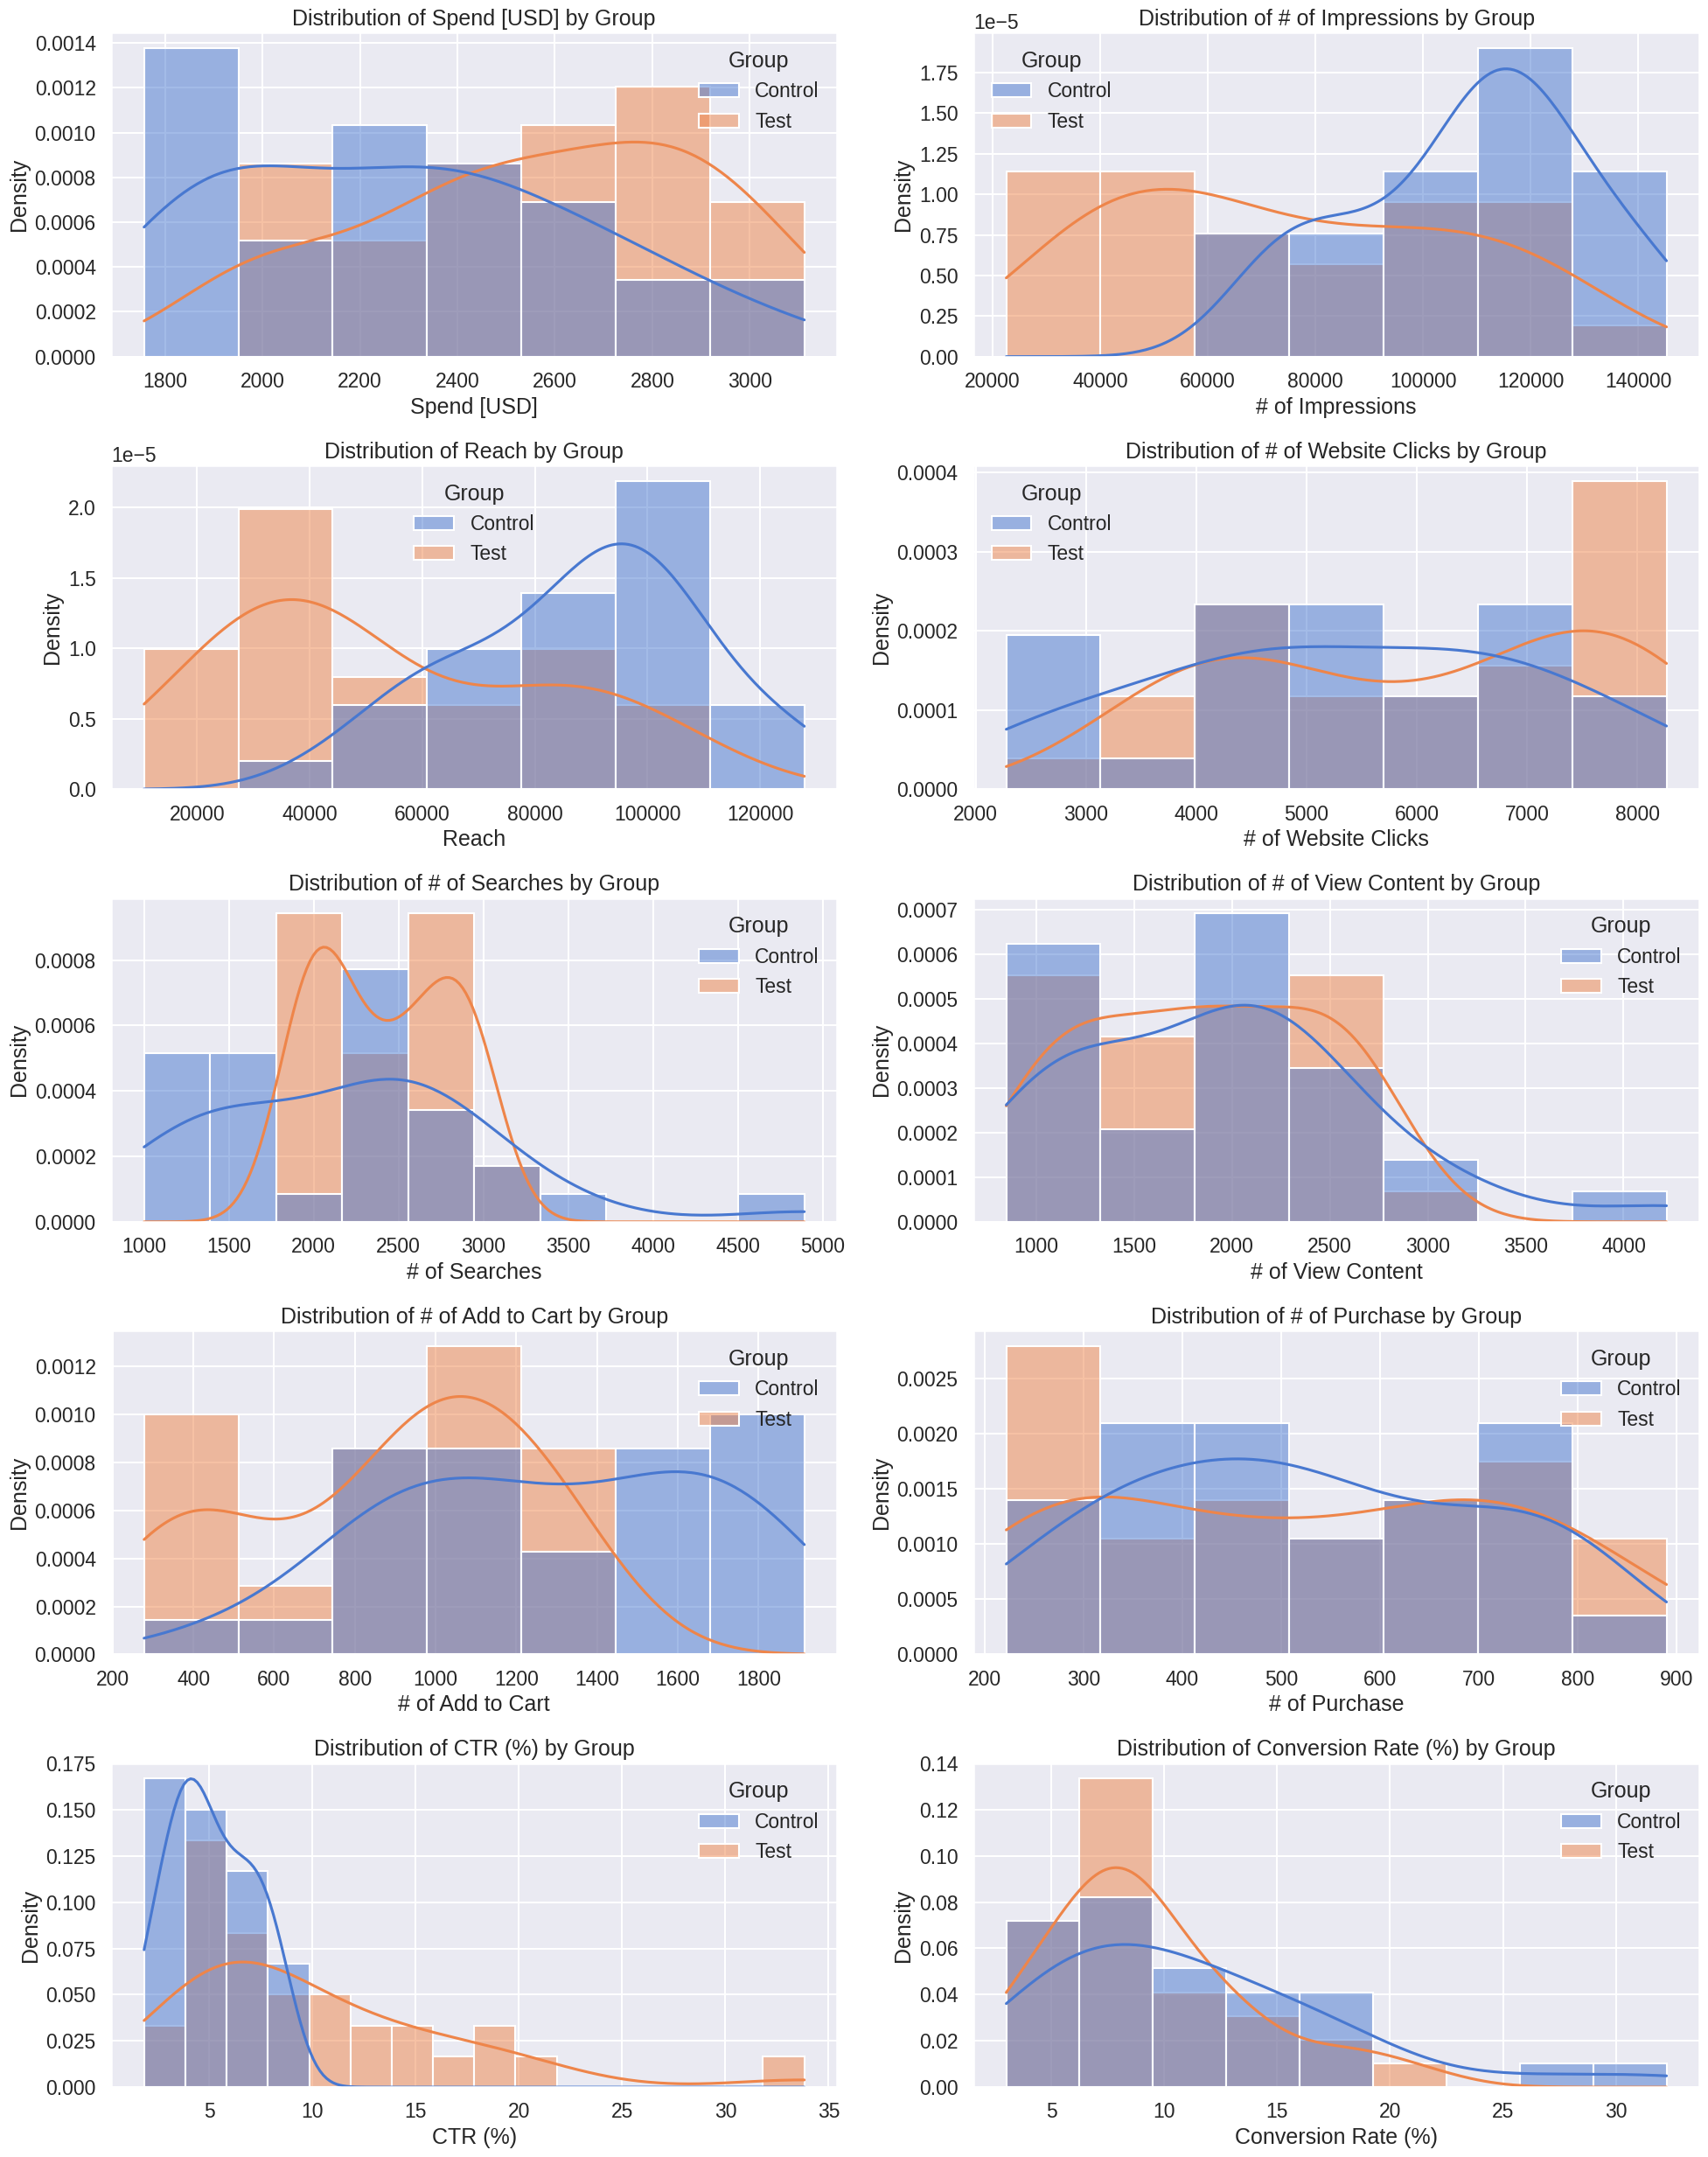

Box plots grid saved to content/boxplots_grid.png


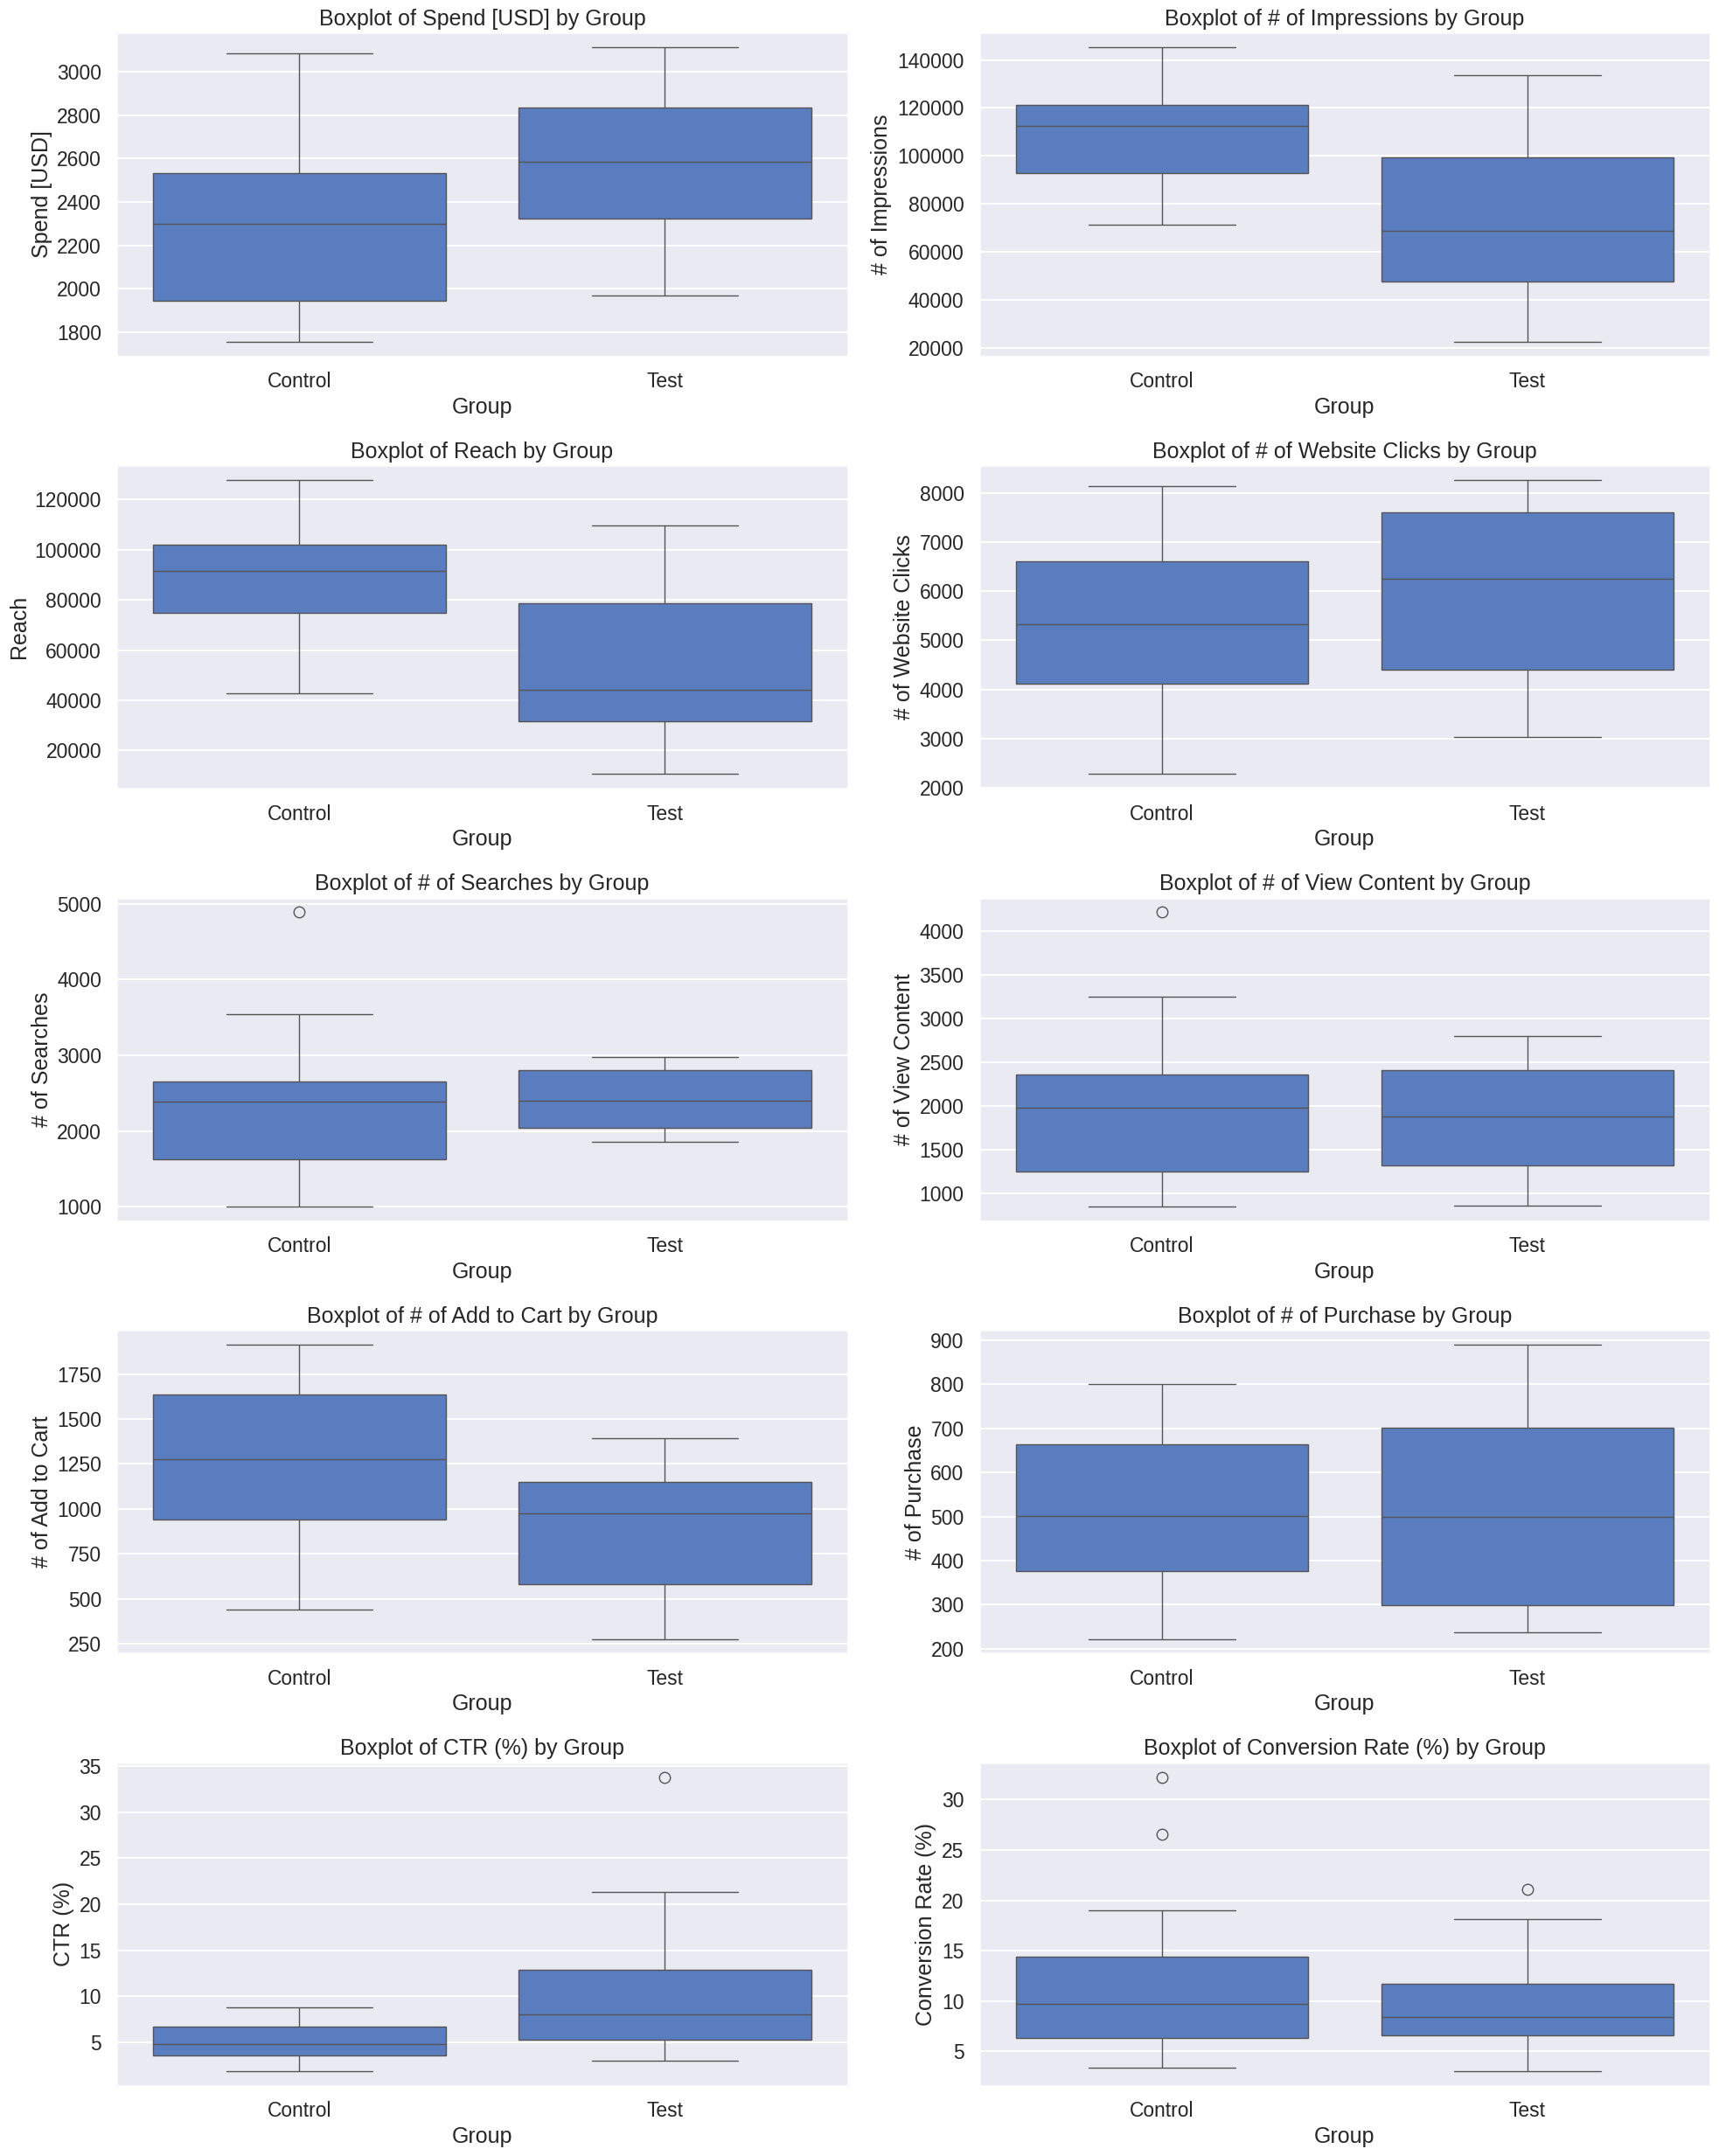

Correlation matrix heatmap saved to content/correlation_matrix.png


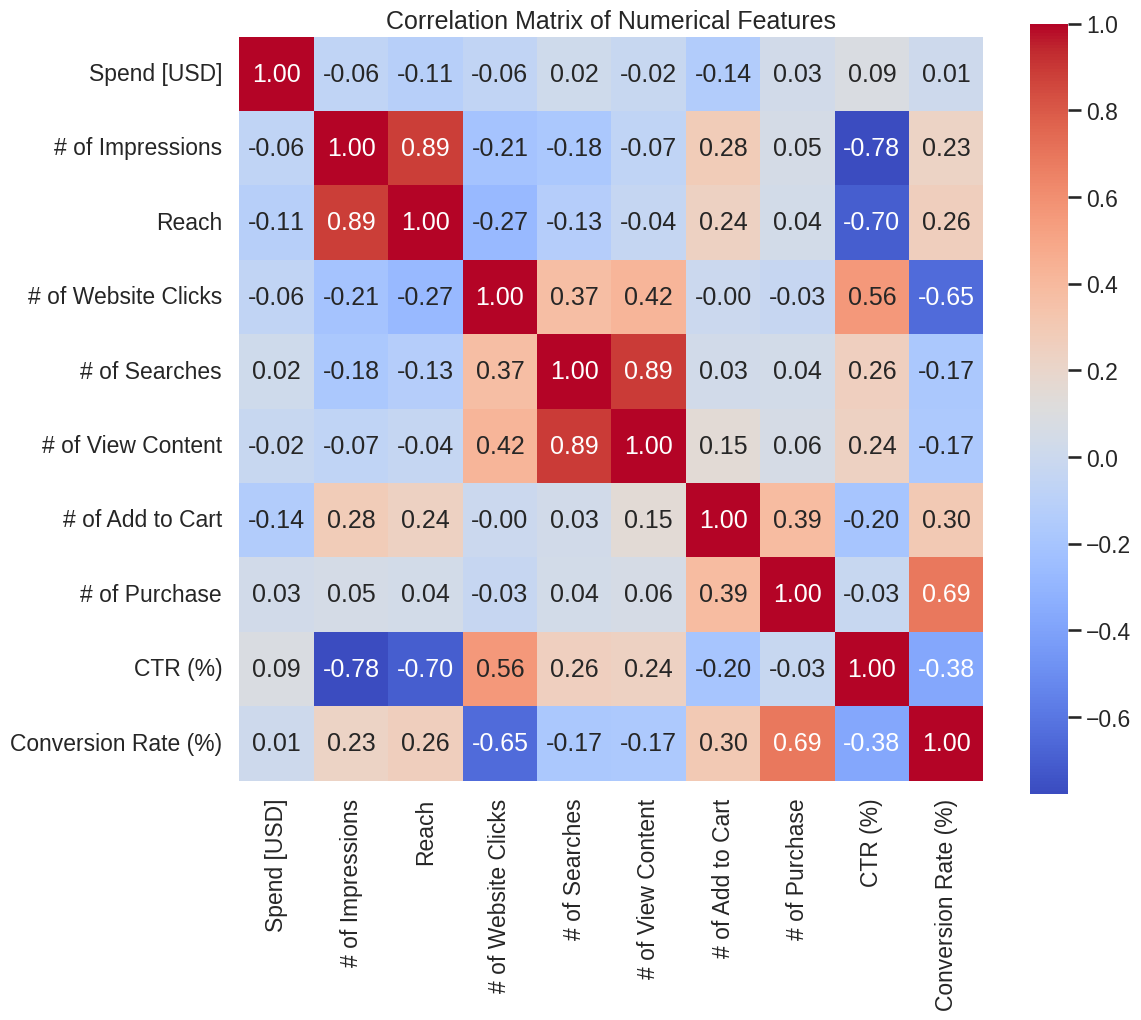

In [ ]:
# Part 2: Exploratory Data Analysis (EDA)

# 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")
%matplotlib inline

# 2. Set Visualization Styles
plt.style.use('seaborn-darkgrid')
sns.set_palette("muted")
sns.set_context("talk")

# 3. Define Numerical Columns to Analyze
numerical_cols = [
    'Spend [USD]',
    '# of Impressions',
    'Reach',
    '# of Website Clicks',
    '# of Searches',
    '# of View Content',
    '# of Add to Cart',
    '# of Purchase',
    'CTR (%)',
    'Conversion Rate (%)'
]

# 4. Create Directory to Save Plots
save_dir = 'content'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 5. Plot Distributions in a Grid Layout and Save
def plot_distributions_grid(data, columns, group_col='Group', rows=5, cols=2, figsize=(20, 25), save_path=None):
    """
    Plots distribution histograms with KDE for multiple numerical columns in a grid layout and saves the figure.

    Parameters:
    - data: DataFrame containing the data.
    - columns: List of numerical columns to plot.
    - group_col: Column name for grouping (e.g., 'Group').
    - rows: Number of rows in the grid.
    - cols: Number of columns in the grid.
    - figsize: Size of the entire figure.
    - save_path: Path to save the figure (including filename and extension).
    """
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()

    for idx, col in enumerate(columns):
        sns.histplot(
            data=data,
            x=col,
            hue=group_col,
            kde=True,
            stat="density",
            common_norm=False,
            ax=axes[idx]
        )
        axes[idx].set_title(f'Distribution of {col} by {group_col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Density')


    for idx in range(len(columns), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300)
        print(f"Distribution plots grid saved to {save_path}")

    plt.show()

# 6. Plot Boxplots in a Grid Layout and Save
def plot_boxplots_grid(data, columns, group_col='Group', rows=5, cols=2, figsize=(20, 25), save_path=None):
    """
    Plots boxplots for multiple numerical columns by group in a grid layout and saves the figure.

    Parameters:
    - data: DataFrame containing the data.
    - columns: List of numerical columns to plot.
    - group_col: Column name for grouping (e.g., 'Group').
    - rows: Number of rows in the grid.
    - cols: Number of columns in the grid.
    - figsize: Size of the entire figure.
    - save_path: Path to save the figure (including filename and extension).
    """
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()

    for idx, col in enumerate(columns):
        sns.boxplot(
            x=group_col,
            y=col,
            data=data,
            ax=axes[idx]
        )
        axes[idx].set_title(f'Boxplot of {col} by {group_col}')
        axes[idx].set_xlabel(group_col)
        axes[idx].set_ylabel(col)


    for idx in range(len(columns), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()


    if save_path:
        plt.savefig(save_path, dpi=300)
        print(f"Box plots grid saved to {save_path}")

    plt.show()

# 7. Plot Correlation Matrix and Save
def plot_correlation_matrix(data, columns, figsize=(12,10), save_path=None):
    """
    Plots a heatmap of the correlation matrix for specified numerical columns and saves the figure.

    Parameters:
    - data: DataFrame containing the data.
    - columns: List of numerical columns to include in the correlation matrix.
    - figsize: Size of the figure.
    - save_path: Path to save the figure (including filename and extension).
    """
    corr_matrix = data[columns].corr()

    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Matrix of Numerical Features')

    if save_path:
        plt.savefig(save_path, dpi=300)
        print(f"Correlation matrix heatmap saved to {save_path}")

    plt.show()

# 8. Identify and Analyze Outliers
from scipy import stats

# Calculate Z-scores
z_scores = np.abs(stats.zscore(combined_data[numerical_cols]))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
num_outliers = outliers.sum()
print(f"Number of outlier records based on Z-score > {threshold}: {num_outliers}")

# Display outlier records
if num_outliers > 0:
    print("\nOutlier Records:")
    display(combined_data[outliers])
else:
    print("\nNo significant outliers detected based on Z-score method.")

# 9. Summarize Key Findings
# Group statistics
group_stats = combined_data.groupby('Group')[numerical_cols].agg(['mean', 'median', 'std']).transpose()

# Display group statistics
print("\nGroup-wise Statistical Summary:")
display(group_stats)

# 10. Execute Grid Plotting Functions and Save Plots
# Define file paths
distribution_save_path = os.path.join(save_dir, 'distribution_plots_grid.png')
boxplots_save_path = os.path.join(save_dir, 'boxplots_grid.png')
correlation_save_path = os.path.join(save_dir, 'correlation_matrix.png')

# Plot all distribution histograms in a single grid and save
plot_distributions_grid(
    data=combined_data,
    columns=numerical_cols,
    group_col='Group',
    rows=5,
    cols=2,
    figsize=(20, 25),
    save_path=distribution_save_path
)

# Plot all boxplots in a single grid and save
plot_boxplots_grid(
    data=combined_data,
    columns=numerical_cols,
    group_col='Group',
    rows=5,
    cols=2,
    figsize=(20, 25),
    save_path=boxplots_save_path
)

# Plot correlation matrix and save
plot_correlation_matrix(
    data=combined_data,
    columns=numerical_cols,
    figsize=(12,10),
    save_path=correlation_save_path
)
